In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

#machine learning packages
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


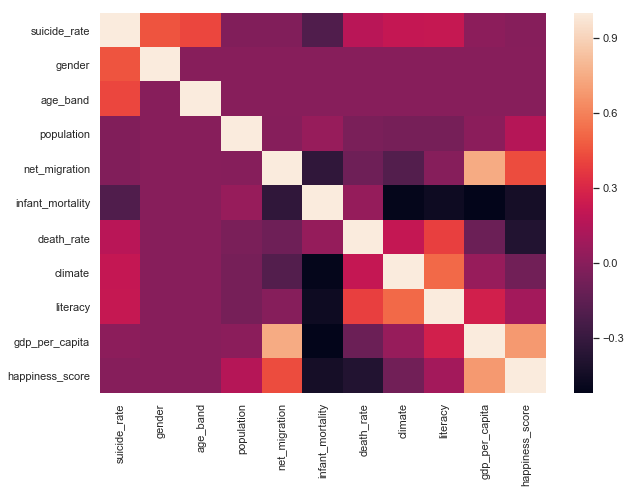

In [2]:
df = pd.read_csv('/Users/yanfeiwang/Desktop2/python/input_shee/suicide_df.csv')
# calculate the correlation matrix
corr = df.corr()
# plot the heatmap
sns.set(rc={'figure.figsize':(10,7)})
sns_plot1=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
sns_plot1.figure.savefig("correlation.png")

In [3]:
df.head()

,suicide_rate,gender,age_band,population,net_migration,infant_mortality,death_rate,climate,literacy,gdp_per_capita,happiness_score
0,34.38,1,5,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
1,18.74,1,1,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
2,14.31,1,4,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
3,14.13,1,2,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
4,12.25,1,3,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574


In [12]:
y = df['suicide_rate']
X = df.drop('suicide_rate', axis =1)

In [5]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
y_train = np.array(train['suicide_rate'])
X_train = train.drop('suicide_rate', axis =1)

test = df[~msk]
y_test = np.array(test['suicide_rate'])
X_test = test.drop('suicide_rate', axis =1)

In [22]:
y_lr = LinearRegression().fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_lr, y_test)
print('Mean Absolute Error is %2f for linear regression model after Train-Test split.' %(mean_absolute_error(y_lr, y_test)))

Mean Absolute Error is 7.574299 for linear regression model after Train-Test split.


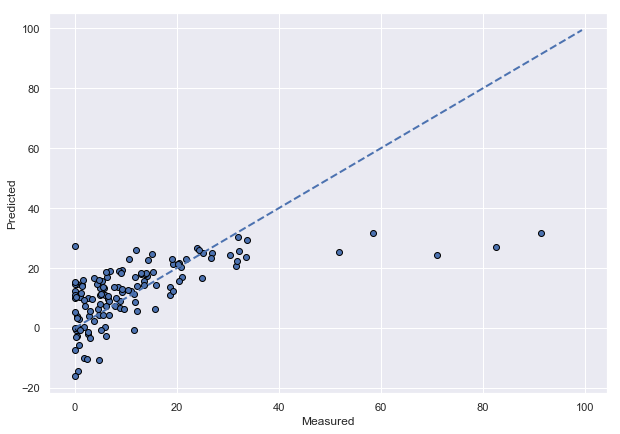

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_lr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [15]:
#cross validation
my_pipeline1 = make_pipeline(Imputer(), LinearRegression())
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(my_pipeline1, X, y, scoring='neg_mean_absolute_error', cv=5)
print('Mean Absolute Error is %2f for linear regression model after cross-validation on 20 percent holdout set.' %(-1 * scores1.mean()))


Mean Absolute Error is 7.459233 for linear regression model after cross-validation on 20 percent holdout set.


In [16]:
y_rf = RandomForestRegressor().fit(X_train, y_train).predict(X_test)
print('Mean Absolute Error is %2f for RandomForest Regression model after Train-Test split.' %(mean_absolute_error(y_rf, y_test)))


Mean Absolute Error is 3.748120 for RandomForest Regression model after Train-Test split.


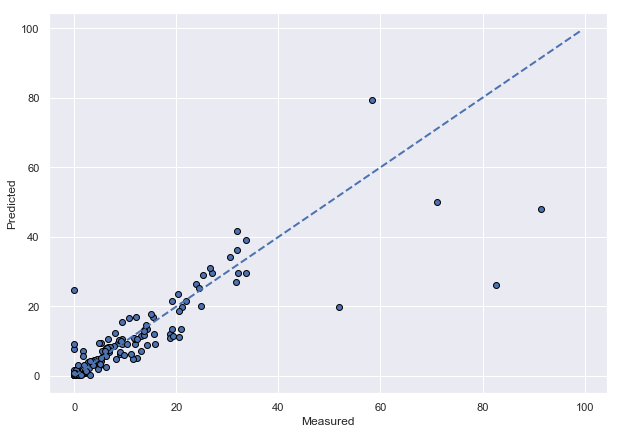

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_rf, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [17]:
#cross validation
my_pipeline2 = make_pipeline(Imputer(), RandomForestRegressor())
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(my_pipeline2, X, y, scoring='neg_mean_absolute_error', cv=5)
print('Mean Absolute Error is %2f for random forest regression model after cross-validation on 20 percent holdout set.' %(-1 * scores2.mean()))



Mean Absolute Error is 5.731361 for random forest regression model after cross-validation on 20 percent holdout set.


In [18]:
y_svr = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, y_train).predict(X_test)
print('Mean Absolute Error is %2f for support vector regression model after Train-Test split.' %(mean_absolute_error(y_svr, y_test)))


Mean Absolute Error is 49.713233 for support vector regression model after Train-Test split.


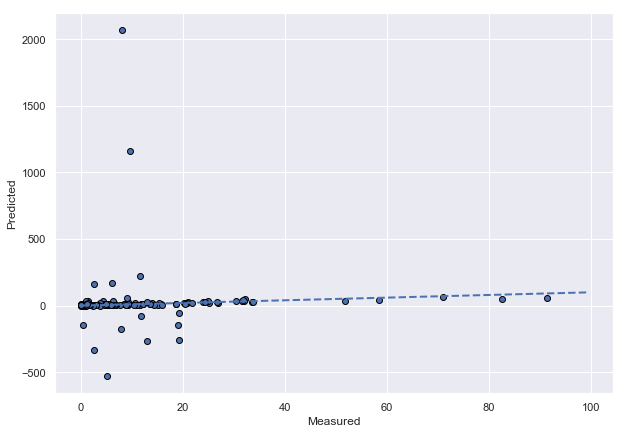

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_svr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
my_pipeline3 = make_pipeline(Imputer(), SVR())
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(my_pipeline3, X, y, scoring='neg_mean_absolute_error', cv=5)
print('Mean Absolute Error is %2f for support vector regression after cross-validation on 20 percent holdout set.' %(-1 * scores3.mean()))

Mean Absolute Error is 8.923134 for support vector regression after cross-validation on 20 percent holdout set.


In [40]:
#Least Absolute Shrinkage and Selection Operator(LASSO) for inference
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [45]:
y = df['suicide_rate']
X = df.drop('suicide_rate', axis =1)
X.columns

Index(['gender', 'age_band', 'population', 'net_migration', 'infant_mortality',
       'death_rate', 'climate', 'literacy', 'gdp_per_capita',
       'happiness_score'],
      dtype='object')

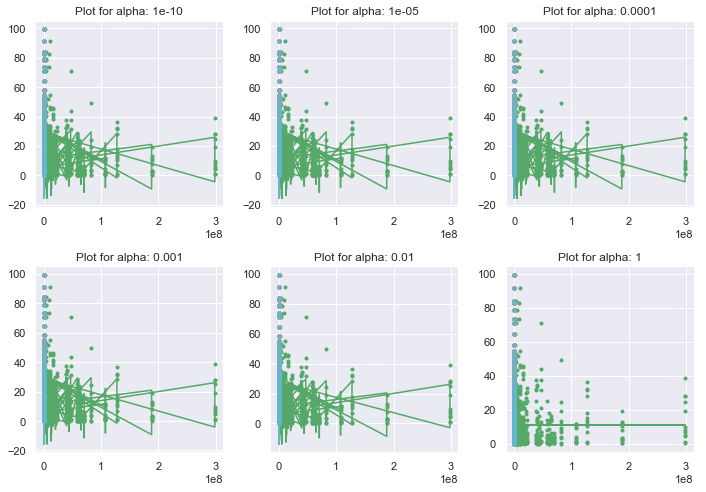

In [56]:
predictors = X.columns
#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['gender', 'age_band', 'population', 'net_migration', 'infant_mortality',
       'death_rate', 'climate', 'literacy', 'gdp_per_capita',
       'happiness_score']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(df, predictors, alpha_lasso[i], models_to_plot)

In [59]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,gender,age_band,population,net_migration,infant_mortality,death_rate,climate,literacy,gdp_per_capita,happiness_score
alpha_1e-15,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_1e-10,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_1e-08,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_1e-05,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_0.0001,6.8e+04,-28,13,3.5,-1.9e-09,0.042,-0.18,0.65,1.2,0.16,-7.3e-05,0.73
alpha_0.001,6.8e+04,-27,13,3.5,-1.2e-09,0.0012,-0.19,0.64,1.1,0.16,-6.4e-05,0.57
alpha_0.01,6.9e+04,-22,12,3.3,-0,-0,-0.16,0.53,1.1,0.15,-3.3e-05,0
alpha_1,1.3e+05,11,0,0,-0,-0,-0,0,0,0,0,-0
alpha_5,1.3e+05,11,0,0,-0,-0,-0,0,0,0,0,-0
alpha_10,1.3e+05,11,0,0,-0,-0,-0,0,0,0,0,-0


As expected, we see higer RSS for higher alphas, and at high alpha values, all features have coefficient 0. When the alpha value is 0.01, the coefficient for happiness_score is 0; and when alpha is smaller than 0.01, the higher happiness score led to higher suicide rate. It should be noted that such L1 regularized regression is unstable in a similar way as unregularized linear models are: the coefficients can vary significantly on small data changes when there are correlated features in the data. And in this dataset, the happiness score of a region/country could be correlated to several of the other features of the same region/country, although the correlation is hypothesized to be small since happiness score is generally a combination of individual-level data sets which reflects the life satisfaction level of the individuals. This inference does in part agree with what has been reported by psychologists as 'the happiness-suicide paradox'(ref: Journal of Economic Behavior & Organization 80(3), December 2011). Using U.S. and international data, researchers found that the happiest places tend to have the highest suicide rates. The most compelling explanation of this paradox is, based on my reading and discussion with my psychologist friends, the “no-one-left-to-blame” theory, which is that if you have problems in life， such as a toxic environment or a corrupted government, you can always imagine that life will get a lot better; if you’re surrounded by happy people and bright environment but you’re unhappy then that could create a stronger contrast and maybe you start to blame yourself. 